In [1]:
# import all required libraries

import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the csv file and print the first 5 rows

df = pd.read_csv("../Weekly.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# change the direction colum to binary (0 for Down, 1 for Up)
# print the first 5 rows to see that everything is fine

df["Direction"] = pd.factorize(df.Direction)[0]
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [4]:
# check if there are any blank cells

df.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

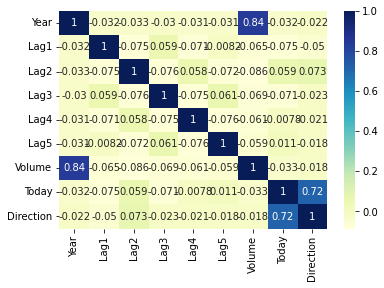

In [5]:
# print the heatmap of correlation for all the data to see the relationships
# this is similar to doing df.corr() for the correlation table but with a visual advantage

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

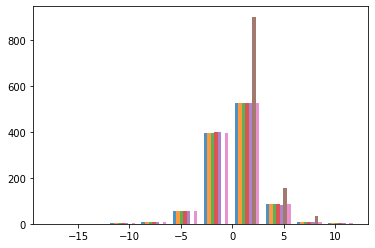

In [6]:
# plot the histogram of the data to see if the distribution is normal or not (it is normal!)
# why plot all the predictors in 1 histogram? because I am lazy but changing figsize could help increase visibility

plt.hist(df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume", "Today"]], stacked=False, alpha=0.8)

plt.show()

In [7]:
# since the exercise wants us to check statistical significance, then statsmodel will be used
# this means first adding a constant to X

X = df.drop(["Direction", "Today"], axis=1)
y = df["Direction"]

In [8]:
X_sm = sm.add_constant(X)

In [9]:
model = sm.Logit(y, X_sm).fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.682349
         Iterations 5


In [10]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1081
Method:                           MLE   Df Model:                            7
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                0.006714
Time:                        18:54:51   Log-Likelihood:                -743.08
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1860
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2258     37.891      0.455      0.649     -57.038      91.490
Year          -0.0085      0.019     -0.448      0.654      -0.046       0.029
Lag1          -0.0407      0.026     -1.538      0.1

In [11]:
# only Lag2 has any statistical significance to the direction of the market

In [12]:
# SKLEARN LOGISTIC REGRESSION

In [13]:
log_reg = LogisticRegression()

model2 = log_reg.fit(X, y)

model2.score(X, y)

0.5601469237832875

In [14]:
# the model is 56% training accuracy score which possibily be much lower if there was test data

In [15]:
y_pred = log_reg.predict(X)
confusion_matrix(y, y_pred)

array([[ 51, 433],
       [ 46, 559]], dtype=int64)

In [16]:
# get the tn, fp, fn, tp of the matrix as percentages of the total observations

cm = confusion_matrix(y, y_pred).ravel()

cm = cm.astype(float) / cm.sum()

tn1, fp1, fn1, tp1 = cm.ravel()

tn1, fp1, fn1, tp1

(0.046831955922865015,
 0.39761248852157943,
 0.04224058769513315,
 0.5133149678604224)

In [17]:
# 39% of the predictions were today go up but it actually went down which is such a bad investment advice model
# however, it rarely made you lose money because only 4.2% of the time did it predict to go down and the market went up

# ideally should calculate
    # precision - tp / tp + fp (what proportion of positive identifications was actually correct)
    # recall (sensitivity) - tp / tp + fn (what proportion of actual positives were identified)
    # specificity - tn / tn + fp (what proportion of actual negatives were identified)

In [23]:
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
specificity = tn1 / (tn1 + fp1)

precision, recall, specificity

(0.563508064516129, 0.9239669421487603, 0.10537190082644629)

In [19]:
# re-run the model using only 1990 to 2008 and Lag2 as the only predictor

df_lag = df[(df["Year"] >= 1990) & (df["Year"] <= 2008)]

X_lag = df_lag[["Lag2"]]
y_lag = df_lag["Direction"]

In [20]:
model3 = log_reg.fit(X_lag, y_lag)
model3.score(X_lag, y_lag)

0.5553299492385787

In [21]:
# get the tn, fp, fn, tp of the matrix as percentages of the total observations

y_pred_lag = model3.predict(X_lag)

cm = confusion_matrix(y_lag, y_pred_lag).ravel()

cm = cm.astype(float) / cm.sum()

tn2, fp2, fn2, tp2 = cm.ravel()

tn2, fp2, fn2, tp2

(0.023350253807106598,
 0.4243654822335025,
 0.02030456852791878,
 0.531979695431472)

In [27]:
precision2 = precision_score(y_lag, y_pred_lag)
recall2 = recall_score(y_lag, y_pred_lag)
specificity2 = tn2 / (tn2 + fp2)

precision2, recall2, specificity2

(0.5562632696390658, 0.9632352941176471, 0.05215419501133787)